##Gaussian Mixed Models



Gaussian Means:
[[2.96718125 6.95894044]
 [6.91978122 2.97780187]]

Gaussian Covariances (Variances):
[[[0.3225355  0.09409717]
  [0.09409717 0.38222499]]

 [[0.50619241 0.11626   ]
  [0.11626    0.32424103]]]


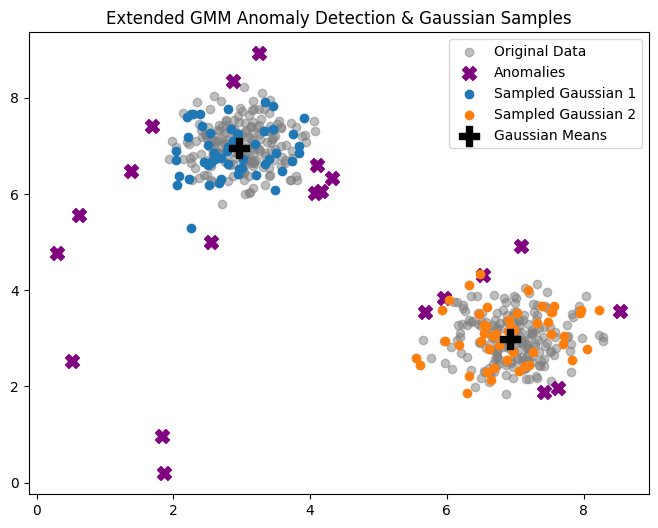

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data with two normal clusters and some anomalies
np.random.seed(42)
########################################           size: 200 2-dimensional data points
cluster1 = np.random.normal(loc=[3, 7], scale=0.5, size=(200, 2))
cluster2 = np.random.normal(loc=[7, 3], scale=0.5, size=(200, 2))
outliers = np.random.uniform(low=0, high=8, size=(10, 2))  # Anomalous points

# Combine the data
X = np.vstack([cluster1, cluster2, outliers])

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Compute anomaly scores (log-likelihood under the model)
log_likelihood = gmm.score_samples(X)

# Define anomaly threshold (lower log-likelihood values indicate anomalies)
threshold = np.percentile(log_likelihood, 5)  # Set threshold at the 5th percentile
anomalies = log_likelihood < threshold

# Print means and variances of the Gaussians
print("Gaussian Means:")
print(gmm.means_)

print("\nGaussian Covariances (Variances):")
print(gmm.covariances_)

'''
About the meaning of covariances: imagine we fit a GMM on 2D data.
The covariance matrices define the elliptical contours of the Gaussians:
	- Large covariance values -> Wide ellipses (high spread).
	- High correlation (nonzero off-diagonal values) -> Tilted ellipses (features are related).
	- Small covariance values -> Compact clusters.
'''

# Generate 100 new samples from each Gaussian component
# It randomly selects a component based on the mixture weights.
# and samples a point from the selected Gaussian distribution.
sampled_data = gmm.sample(100)[0]  # 100 samples from the mixture w/o labels

# Assign colors to each Gaussian component based on predicted labels
predicted_labels = gmm.predict(sampled_data)

# Plot original data, anomalies, and sampled points from each Gaussian
plt.figure(figsize=(8, 6))

# Plot original data
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label="Original Data")

# Plot anomalies
plt.scatter(X[anomalies, 0], X[anomalies, 1], c='purple', marker='X', s=100, label="Anomalies")

# Plot sampled points from each Gaussian with different colors
for i in range(gmm.n_components):
    plt.scatter(sampled_data[predicted_labels == i, 0],
                sampled_data[predicted_labels == i, 1],
                label=f"Sampled Gaussian {i+1}")

# Mark cluster means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', marker='P', s=200, label="Gaussian Means")

plt.title("Extended GMM Anomaly Detection & Gaussian Samples")
plt.legend()
plt.show()


In [2]:
# Get probabilistic cluster memberships
probabilities = gmm.predict_proba(X)

# Print the first 5 rows of probabilities
print("Probabilistic cluster memberships (first 5 points):\n", probabilities[:5])

Probabilistic cluster memberships (first 5 points):
 [[1.00000000e+00 2.63730531e-23]
 [1.00000000e+00 6.36186086e-29]
 [1.00000000e+00 8.04618093e-25]
 [1.00000000e+00 1.08953060e-23]
 [1.00000000e+00 3.48234859e-28]]
